# Hands-on with Python + matplotlib



# 1. Improving Pie Charts

*What is wrong with this figure?* 

![](https://drive.google.com/uc?id=1K6hCHovjZV5Icbn3zd-gW86RSRjiH0i-)

## Let's agree that this is a monstrosity.  Now, how do we improve it?

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

## 1.1. Read in the data

*This is a made up data set that a colleague of mine. We have 10 items, each with a text label and a numeric value.*

*I'm using the python library pandas to read in the data.*

In [2]:
url = 'https://raw.githubusercontent.com/ageller/IDEAS_FSS-Vis/master/matplotlib/bar/bar.csv'
data = pd.read_csv(url)
data


,Label,Value
0,Encoding Visual Meaning,10.0
1,Truncating Axes,3.0
2,Data to Ink Ratio,9.5
3,Efficiency of Cognition,9.0
4,"Binning, Subsetting, Scoping",5.0
5,More Dimension per Data,0.1
6,Accurate Geometry,10.0
7,Color Choice,7.0
8,Labels and Legends,8.0
9,More Data per Dimension,2.0


## 1.2. Pie charts are generally just bad.  Let's use a bar chart instead.

*Here is the default bar chart from python.  Leaves lots to be desired...*

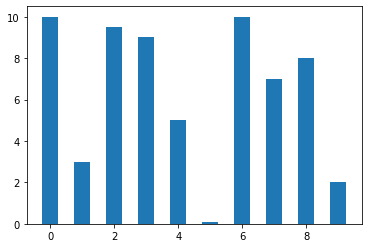

In [3]:
f,ax = plt.subplots()

ind = np.arange(len(data))  # the x locations for the bars
width = 0.5 # the width of the bars
rects = ax.bar(ind, data['Value'], width)

## 1.3. Add some labels

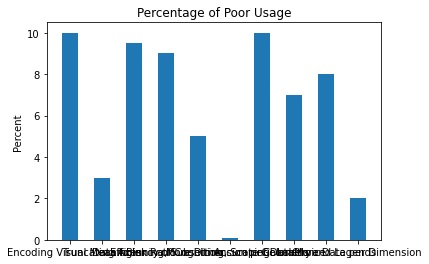

In [4]:
f,ax = plt.subplots()

ind = np.arange(len(data))  # the x locations for the bars
width = 0.5 # the width of the bars
rects = ax.bar(ind, data['Value'], width)

# add some text for labels, title and axes ticks
ax.set_ylabel('Percent')
ax.set_title('Percentage of Poor Usage')
ax.set_xticks(ind)
_ = ax.set_xticklabels(data['Label'])

## 1.4. Sort the data, and add the percentage values to each bar


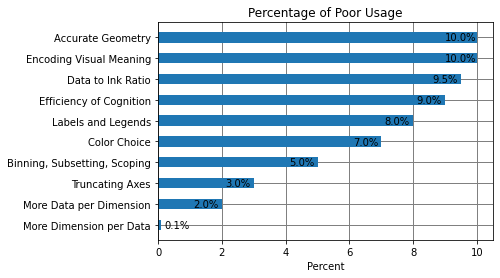

In [5]:
f,ax = plt.subplots()

#sort the data (nice aspect of pandas dataFrames)
data.sort_values('Value', inplace=True)

ind = np.arange(len(data))  # the x locations for the bars
width = 0.5 # the width of the bars
rects = ax.barh(ind, data['Value'], width, zorder=2)

# add some text for labels, title and axes ticks
ax.set_xlabel('Percent')
ax.set_title('Percentage of Poor Usage')
ax.set_yticks(ind)
ax.set_yticklabels(data['Label'])

#add a grid behind the plot
ax.grid(color='gray', linestyle='-', linewidth=1, zorder = 1)

#I grabbed this from here : https://matplotlib.org/examples/api/barchart_demo.html
#and tweaked it slightly 
for r in rects:
    h = r.get_height()
    w = r.get_width()
    y = r.get_y()
    if (w > 1):
        x = w - 0.5
    else:
        x = w + 0.5
    ax.text(x, y ,'%.1f%%' % w, ha='center', va='bottom', zorder = 3) 
        

## 1.5. Clean this up a bit
* I don't want the grid lines anymore
* Make the font larger
* Let's change the colors, and highlight one of them
* Save the plot

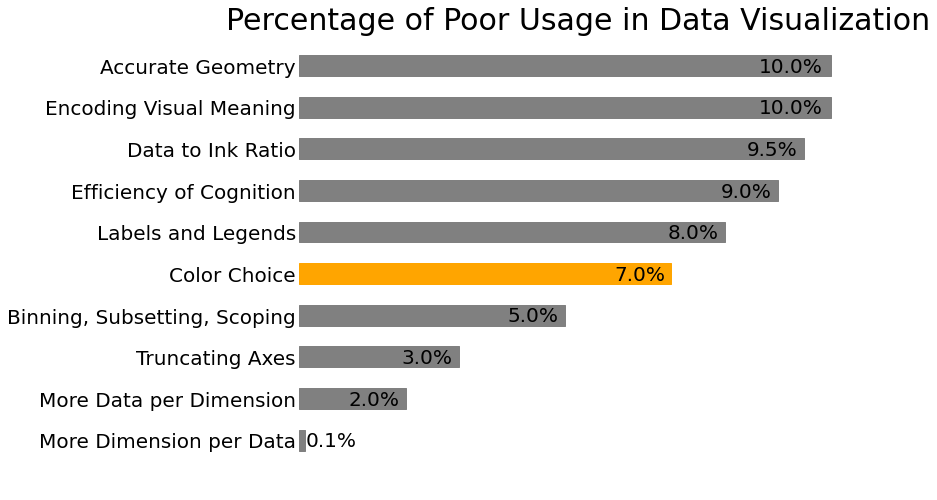

In [6]:
#this will change the font globally, but you could also change the fontsize for each label independently
font = {'size' : 20}
matplotlib.rc('font', **font) 

f,ax = plt.subplots(figsize=(10,8))

#sort the data (nice aspect of pandas dataFrames)
data.sort_values('Value', inplace=True)

ind = np.arange(len(data))  # the x locations for the bars
width = 0.5 # the width of the bars
rects = ax.barh(ind, data['Value'], width, zorder=2)

# add some text for labels, title and axes ticks
ax.set_title('Percentage of Poor Usage in Data Visualization', fontsize = 30)
ax.set_yticks(ind)
ax.set_yticklabels(data['Label'])

#remove all the axes, ticks and lower x label
aoff = ['right', 'left', 'top', 'bottom']
for x in aoff:
    ax.spines[x].set_visible(False)
ax.tick_params(length=0)
ax.set_xticklabels([' ']*len(data))


#I grabbed this from here : https://matplotlib.org/examples/api/barchart_demo.html
#and tweaked it slightly 
highlight = [4]
for i, r in enumerate(rects):
    h = r.get_height()
    w = r.get_width()
    y = r.get_y()
    if (w >= 10):
        x = w - 0.75
    elif (w > 1):
        x = w - 0.6
    else:
        x = w + 0.5
    r.set_color('gray')
    if (i in highlight):
        r.set_color('orange')
    ax.text(x, y ,'%.1f%%' % w, ha='center', va='bottom', zorder = 3) 

    
#f.savefig('bar.pdf',format='pdf', bbox_inches = 'tight') 


# 2. Scatter Plots

In [7]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

## 2.1. Read in the data

*These two data sets are from https://voteview.com/data and use the using the [DW-NOMINATE method](https://en.wikipedia.org/wiki/NOMINATE_(scaling_method)) to evaluate the political characteristics of individuals on a scale from 0 to 1.  Each row in the data is for a different congress person and contains the name, and "x" value and an "alt" value.  The horizonal axis, "x", measures the level of liberal (low "X") or conservative (high "x") ideology and can also be interpreted as the position on government intervention in the economy.  The vertical axis, "alt" can be interpreted as the position on cross-cutting, salient issues of the day.  Most experts agree that the "x" dimension explains the vast majority of differences in voting behaviors.

*I'm using the python library pandas to read in the data.*

In [8]:
url90 = 'https://raw.githubusercontent.com/ageller/IDEAS_FSS-Vis/master/matplotlib/scatter/congress90.csv'
c90 = pd.read_csv(url90)
c90

,name,x,alt
0,JOHNSON,-0.337,-0.035
1,EDWARDS J.,0.177,0.161
2,DICKINSON,0.398,-0.057
3,ANDREWS G.,-0.030,1.000
4,NICHOLS,-0.042,0.872
...,...,...,...
533,BYRD R.,-0.309,0.729
534,PROXMIRE,-0.598,0.801
535,NELSON,-0.567,0.198
536,HANSEN,0.489,-0.036


In [9]:
url116 = 'https://raw.githubusercontent.com/ageller/IDEAS_FSS-Vis/master/matplotlib/scatter/congress116.csv'
c116 = pd.read_csv(url116)
c116

,name,x,alt
0,"SEWELL, Terri",-0.393,0.400
1,"ROBY, Martha",0.362,0.658
2,"BROOKS, Mo",0.653,-0.434
3,"BYRNE, Bradley",0.610,0.250
4,"PALMER, Gary James",0.703,-0.021
...,...,...,...
539,"MANCHIN, Joe, III",-0.057,0.440
540,"BALDWIN, Tammy",-0.492,-0.140
541,"JOHNSON, Ron",0.601,-0.254
542,"BARRASSO, John A.",0.544,0.241


## 2.2 Let's plot these as two subplots

*Is there anything that we should improve upon here?*

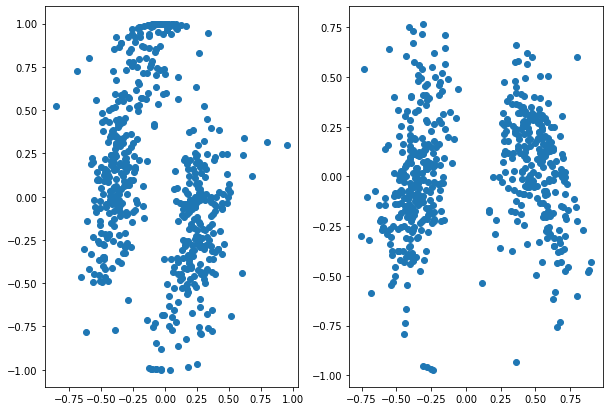

In [10]:
#define the subplots and figure size
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,7))

#plot the data with better colors
ax1.scatter(c90['x'], c90['alt'])
ax2.scatter(c116['x'], c116['alt'])

## 2.3 Let's improve this
* We need to force the axes to have the same limits
* Let's add some descriptive labels to the axes
* In that case, they could share a y axis
* We can improve the colors

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in sqrt


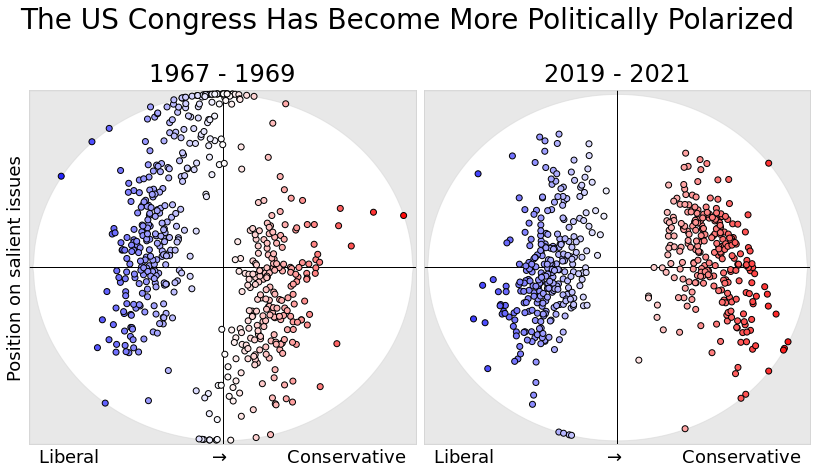

In [11]:
#define the subplots and figure size
f, (ax1, ax2) = plt.subplots(1, 2,  figsize = (14, 6.5), sharey = True)

#plot the data with better colors
ax1.scatter(c90['x'], c90['alt'],  edgecolors = 'black', zorder = 3, c = c90['x'], cmap = 'bwr', vmin = -1, vmax = 1)
ax2.scatter(c116['x'], c116['alt'], edgecolors = 'black', zorder = 3, c = c116['x'], cmap = 'bwr' , vmin = -1, vmax = 1)

#add axes labels,and define the limits
ax1.set_ylabel('Position on salient issues',fontsize = 18)
#lim = 1.07
lim = 1.02
for a in [ax1, ax2]:
  a.set_xlabel(r'Liberal                   $\rightarrow$          Conservative', fontsize = 18)
  a.set_xlim(-lim, lim)
  a.set_ylim(-lim, lim)

#add titles
f.suptitle('The US Congress Has Become More Politically Polarized', fontsize=28,  y=1.06)
#ax1.set_title('Congress 90', fontsize = 24)
#ax2.set_title('Congress 116', fontsize = 24)
ax1.set_title('1967 - 1969', fontsize = 24, y = 1.01)
ax2.set_title('2019 - 2021', fontsize = 24, y = 1.01)

#add a grid? (and darker lines crossing the origin)
#t = np.arange(9)/4. - 1
#t = np.arange(5)/2. - 1
#maybe even remove the ticks entirely, since they don't really have much physical meaning
t = []
for a in [ax1, ax2]:
  a.set_yticks(t)
  a.set_xticks(t)
  a.grid(color='lightgray', linestyle='-', linewidth=1, zorder = 1, alpha = 0.5)


#add a darker central axis to mark the (0,0) origin
for a in [ax1, ax2]:
  a.plot([0,0],[-2,2], color='black', zorder = 2, linewidth=1)
  a.plot([-2,2],[0,0], color='black', zorder = 2, linewidth=1)

#lighten the outer axis?
for a in [ax1, ax2]:
  a.spines['bottom'].set_color('lightgray')
  a.spines['top'].set_color('lightgray') 
  a.spines['right'].set_color('lightgray')
  a.spines['left'].set_color('lightgray')

#gray out the area where no data can occupy?
x = np.linspace(-lim,lim,500)
y = np.nan_to_num((1. - x*x)**0.5)
for a in [ax1, ax2]:
  a.fill_between(x, lim, y, color='lightgray', alpha=0.5)
  a.fill_between(x, -lim, -y, color='lightgray', alpha=0.5)

#Fine-tune figure; make subplots close to each other and hide x ticks for
f.subplots_adjust(wspace=0.02)

#also hide the ticks in the middle 
ax2.yaxis.set_ticks_position('none') 

#f.savefig('scatter.pdf',format='pdf', bbox_inches = 'tight')

## 2.4 Would this be better as two overlapping histograms?

*If we don't really care about the y axis, we don't need to use it.*

Text(0.43, 0.75, '2019 - 2021')

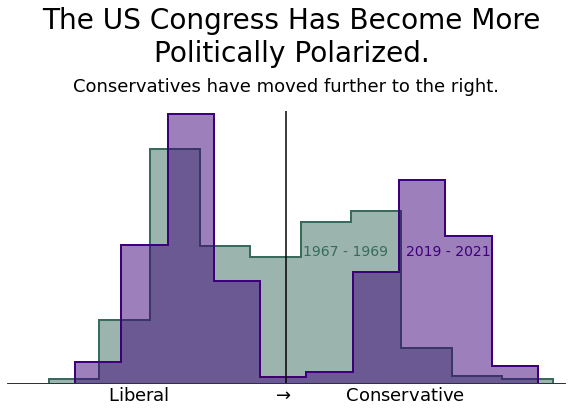

In [18]:
f, ax = plt.subplots(figsize=(10,5))

color1 = '#386B5D'
color2 = '#3D007A'
ax.hist(c90['x'], density=True, alpha=0.5, color=color1)
ax.hist(c90['x'], density=True, histtype='step', color=color1, linewidth=2)
ax.hist(c116['x'], density=True, alpha=0.5, color=color2)
ax.hist(c116['x'], density=True, histtype='step', color=color2, linewidth=2)

#add title and labels
f.suptitle('The US Congress Has Become More\nPolitically Polarized.', fontsize=28,  y=1.17, x=0.52)
ax.set_title('Conservatives have moved further to the right.', fontsize=18, y=1.05)
ax.set_xlabel(r'Liberal                  $\rightarrow$         Conservative', fontsize = 18)

#set the limits
ax.set_xlim(-1, 1)
ax.set_ylim(0, 1.6)

#remove the ticks entirely, since they don't really have much physical meaning
t = []
ax.set_yticks(t)
ax.set_xticks(t)

#add a center line
ax.plot([0,0],[0,1.6], color = 'black')

#remove a few of the axes?
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.spines['left'].set_visible(False) 

#add annotations
#ax.annotate("1967 - 1969", xy = (0.5,1.5), fontsize = 14, color = color1)
#ax.annotate("2019 - 2021", xy = (0.5,1.37), fontsize = 14, color = color2)
ax.annotate("1967 - 1969", xy = (0.06,0.75), fontsize = 14, color = color1)
ax.annotate("2019 - 2021", xy = (0.43,0.75), fontsize = 14, color = color2)

#f.savefig('hist.pdf',format='pdf', bbox_inches = 'tight')